# Plotting with `matplotlib`

- most widely used Python framework for plotting data
- integrates well with `numpy`
- can do line plots, 2D images, 3D surfaces
- output in window, IPython notebook, or directly in a file
- integration with $\mathrm{\TeX}$ typesetting possible

## Line Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['text.usetex'] = True

# first some data to plot
x = np.linspace(0., 2.0 * np.pi, 100)
y = np.sin(x)

The `plot` function produces simple line plots, which can be customized using keyword arguments.

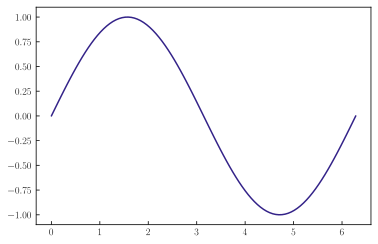

In [2]:
plt.plot(x,y)

All plot commands plot into the same space until a new figure is created using `plt.figure()`. Notebooks do this implicitly after every code block. Colours are automatically cycled.

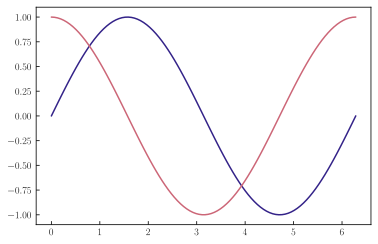

In [3]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Markers
Data points can be marked using different symbols. `plot?` gives an overview.

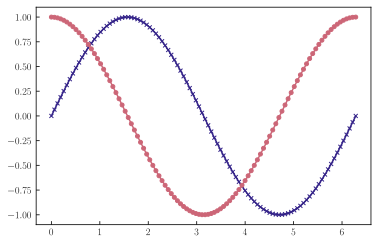

In [4]:
plt.plot(x, np.sin(x), marker='x', markersize=4)
plt.plot(x, np.cos(x), marker='o', markersize=4)

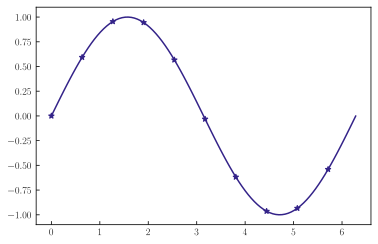

In [5]:
# use fewer markers
plt.plot(x, np.sin(x), marker='*', markevery=10)

### Line styles
Controlled using the `linestyle` or `ls` keyword argument. Styles are described in the docstring (`plot?`).

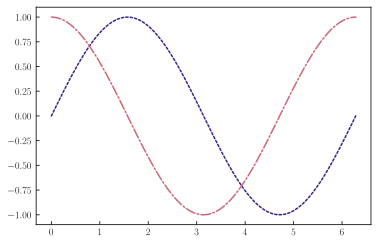

In [6]:
plt.plot(x, np.sin(x), ls=':')
plt.plot(x, np.cos(x), ls='-.')

### Colours
Specified using one-letter abbreviations, full names, or hex RGB value.

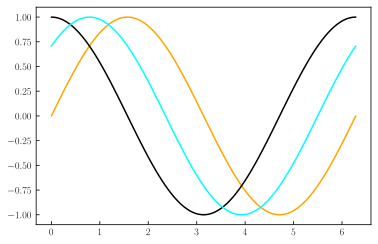

In [7]:
plt.plot(x, np.sin(x), color="orange")
plt.plot(x, np.cos(x), color="k")
plt.plot(x, np.sin(x+0.25*np.pi), color="#00FFFF")

Markers can have different edge and face colours.

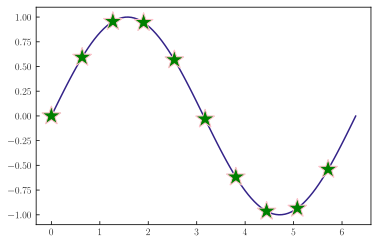

In [8]:
plt.plot(x, np.sin(x), marker='*', ms=20, markevery=10, markeredgecolor="pink", markerfacecolor="green")

### Legend
Labels can be given to lines for use in a legend.

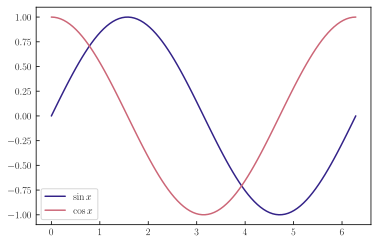

In [9]:
plt.plot(x, np.sin(x), label="$\sin x$")
plt.plot(x, np.cos(x), label="$\cos x$")
plt.legend()

`legend` takes many keyword arguments for placement and formatting.

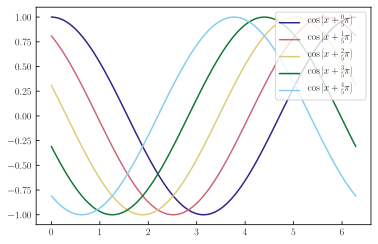

In [10]:
for i in range(5):
    plt.plot(x, np.cos(x + i / 5.0 * np.pi ), label=r"$\cos\left(x + \frac{%d}{5}\pi\right)$" % i)
plt.legend(loc="upper right")

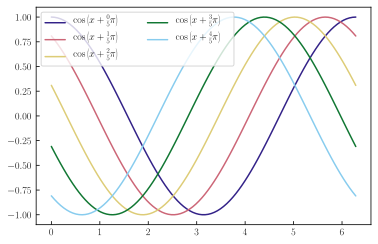

In [11]:
for i in range(5):
    plt.plot(x, np.cos(x + i / 5.0 * np.pi ), label=r"$\cos\left(x + \frac{%d}{5}\pi\right)$" % i)
plt.legend(loc="best", ncol=2)

## Scatter plots
Just showing markers without the lines. Takes almost all the arguments of `plot`.

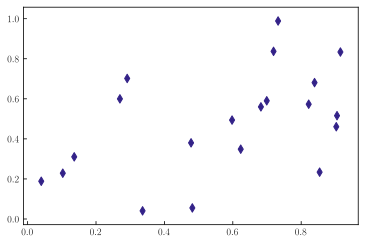

In [12]:
x = np.random.rand(20)
y = np.random.rand(20)
plt.scatter(x,y, marker='d')

## Adjusting the axes

In [13]:
x = np.linspace(0,10,100)

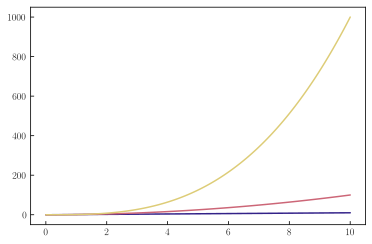

In [14]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

Axis limits can be adjusted.

(0.0, 10.0)

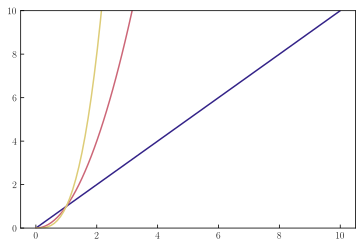

In [15]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.ylim(0., 10.)

Just one limit can be set as well, leaving the other at the automatic value.

(-50.0, 10.0)

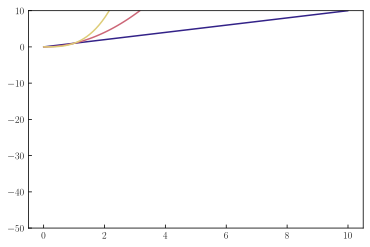

In [16]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.ylim(ymax=10.)

Axes can be set to logarithmic mode.

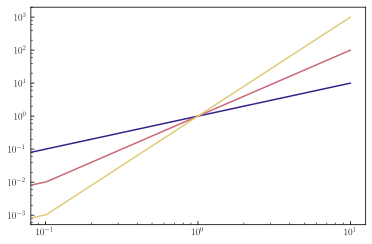

In [17]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.yscale('log')
plt.xscale('log')

For convenience there are variants of `plot` that do this automatically: `semilogx`, `semilogy`, `loglog`.<br/>
When plotting to an interactive window, try pressing `l` and `k` to switch log mode.

#### Labels
Everything put in `$` delimiters is automatically rendered using $\mathrm{\LaTeX}$ math syntax.

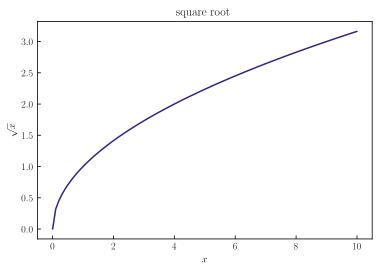

In [18]:
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

The plots so far have been rendered directly using $\mathrm{\LaTeX}$, which depends on `latex` and some other tools being installed. Alternatively there is an internal font engine which also supports math syntax.

In [19]:
plt.rcParams['text.usetex'] = False

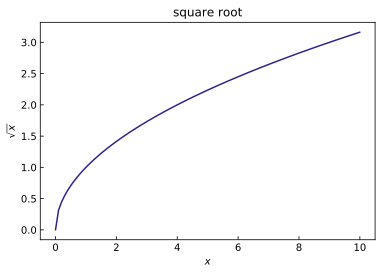

In [20]:
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

#### Fonts
The internal font engine can use any installed font.

In [21]:
plt.rcParams['font.family'] = 'serif'

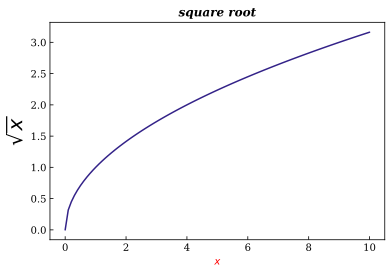

In [22]:
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$', color='red')
plt.ylabel(r'$\sqrt{x}$', fontsize=20)
plt.title('square root', weight='bold', style="italic")

#### Styles
There can be substantial changes in the way plots look like.

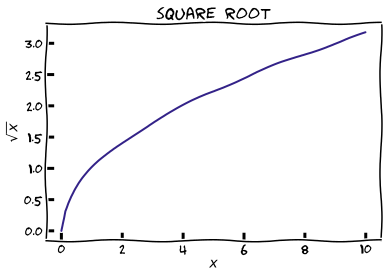

In [23]:
plt.xkcd()
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

There is a couple of default styles. New ones can be added using using files in the matplotlib config dir (on Unix: `~/.config/matplotlib/stylelib`). Useful for keeping settings for different journals.

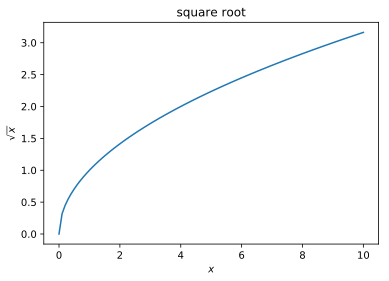

In [24]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [6,4]
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

#### Annotations
Text can be placed anywhere in the figure. Positions can be specified using data or figure coordinates.

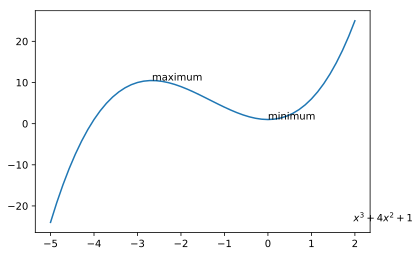

In [25]:
x = np.linspace(-5,2)
f = lambda x: x**3 + 4 * x**2 + 1
plt.plot(x,f(x))
plt.annotate('minimum', [0,1]) # coordinates are in data space by default
plt.annotate('maximum', [-8./3., f(-8./3.)])
plt.annotate(r'$x^3 + 4 x^2 + 1$', [0.95, 0.05], xycoords='axes fraction')
# position in current plot independent of data

This does not look nice. Elements can be put at an offset of the point they annotate. Alignment can be set.

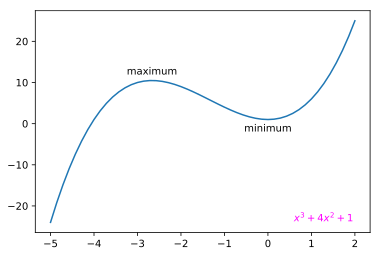

In [26]:
plt.plot(x,f(x))
plt.annotate('minimum', [0,1], xytext=[0,-12], textcoords='offset points',
             horizontalalignment='center')
plt.annotate('maximum', [-8./3., f(-8./3.)], xytext=[0,6],
             textcoords='offset points', horizontalalignment='center')
plt.annotate(r'$x^3 + 4 x^2 + 1$', [0.95, 0.05], xycoords='axes fraction',
             ha='right', color='fuchsia') # ha is short for horizontalalignment
# same text formatting options as for labels

Arrows might be nice.

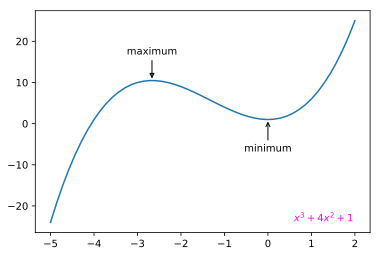

In [27]:
plt.plot(x,f(x))
plt.annotate('minimum', [0,1], xytext=[0,-32],
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), ha='center')
plt.annotate('maximum', [-8./3., f(-8./3.)], xytext=[0,26],
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'), ha='center')
plt.annotate(r'$x^3 + 4 x^2 + 1$', [0.95, 0.05], xycoords='axes fraction',
             ha='right', color='fuchsia')

### Lines and areas

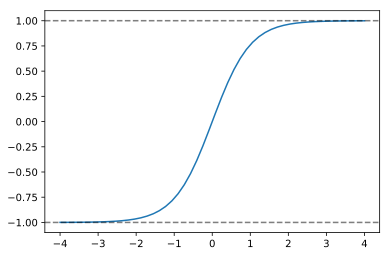

In [28]:
x=np.linspace(-4,4)
plt.plot(x, np.tanh(x))
plt.axhline(1, ls="--", color='k', alpha=0.5) # slightly transparent
plt.axhline(-1, ls="--", color='k', alpha=0.5)

There is also `axvline`.

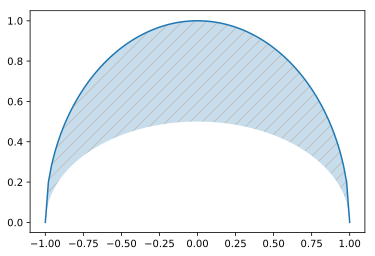

In [29]:
x=np.linspace(-1,1, 100)
f = lambda x: np.sqrt(1-x**2)
g = lambda x: 0.5 * np.sqrt(1-x**2)
plt.plot(x, f(x))
plt.fill_between(x, f(x), y2=g(x), alpha=0.25, hatch='//')

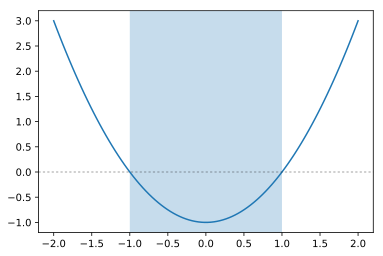

In [30]:
x=np.linspace(-2,2, 100)
plt.plot(x, x**2-1)
plt.axvspan(-1,1, alpha=0.25) # also axhspan
plt.axhline(0, ls=':', alpha=0.25, color='k')